<a href="https://colab.research.google.com/github/wkzhuang/CSYE7200/blob/main/term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weikun Zhuang 001537998

# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [1]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2022-10-05 00:50:56--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2022-10-05 00:50:56--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2022-10-05 00:50:57--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response..

We convert this file with one JSON record on each line to a list of dictionaries.

In [2]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [3]:
terms[1:10]

[{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'academy',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'accused',
  'count': 2},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'actress',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'ad', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'after', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agenda',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agreed',
  'count': 1}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [4]:
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.
doc_terms = [term for term in terms if term.get('id') == 'APW_ENG_20100101.0001']
count_desc = sorted(doc_terms, key=lambda x:x['count'], reverse=True)[0:6]
print([term['term'] for term in count_desc])

['a', 'the', 'and', 'brooks', 'of', 'to']


In [5]:
# TODO: Print the 10 terms from all fields of document APW_ENG_20100102.0077 with the highest count.
doc2_terms = [term for term in terms if term.get('id') == 'APW_ENG_20100102.0077']
count_desc_2 = sorted(doc_terms, key=lambda x:x['count'], reverse=True)[0:10]
print([term['term'] for term in count_desc_2])

['a', 'the', 'and', 'brooks', 'of', 'to', 'he', 'in', 'gomez', 'for']


In [6]:
import pandas as pd

In [7]:
# TODO: Print the 10 terms with the highest total count in the corpus.

# extract term and value only and turn to dataframe
term_count = pd.DataFrame(terms)[['term','count']]

# I interpreted as 10 most frequent terms across all documents
# If this is asking for just the highest 10 count numbers, we can do
# term_count.loc[term_count['count'].drop_duplicates().nlargest(10).index]

# combine counts of the same term
df_new = term_count.groupby(term_count['term']).aggregate('sum')

# retrieve 10 highest count
df_new['count'].nlargest(10)

term
the     62216
to      26931
in      25659
a       23383
of      22326
and     22125
said    10888
for      9716
on       9382
that     8942
Name: count, dtype: int64

Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [18]:
# TODO: Compute the number of distinct documents in the collection.
N = len(set([term['id'] for term in terms]))

# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.
df = dict(pd.DataFrame(terms).groupby('term')['id'].nunique())

In [19]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.

print(df.get('the')/N)

0.9704823614110871


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [22]:
import math

In [24]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
tfidf_terms = terms.copy()
for record in tfidf_terms:
  record['tfidf'] = math.log(record['count']+1)*math.log(N/df['term'])

In [38]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values.
tfidf_DF = pd.DataFrame(tfidf_terms)
tfidf_DF.loc[tfidf_DF['tfidf'].nlargest(20).index]

,id,field,term,count,tfidf
453067,APW_ENG_20100107.0183,body,the,149,15.538846
445595,APW_ENG_20100107.0114,body,the,104,14.432735
377799,APW_ENG_20100106.0834,body,the,102,14.373095
378541,APW_ENG_20100106.0839,body,the,102,14.373095
385416,APW_ENG_20100106.0913,body,the,102,14.373095
385985,APW_ENG_20100106.0915,body,the,102,14.373095
396868,APW_ENG_20100106.1032,body,the,102,14.373095
397896,APW_ENG_20100106.1037,body,the,102,14.373095
163124,APW_ENG_20100104.0648,body,the,101,14.342840
164302,APW_ENG_20100104.0660,body,the,101,14.342840


## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [84]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.

# This step is already computed in the previous question - df_new in the top 10 word in the corpus question
freq = df_new.reset_index().sort_values(by='count', ascending = False)
freq_dict = freq.set_index('term').to_dict()['count']
frequency = list(zip(freq_dict.keys(),freq_dict.values()))
frequency[0]

('the', 62216)

In [39]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'log(frequency)')

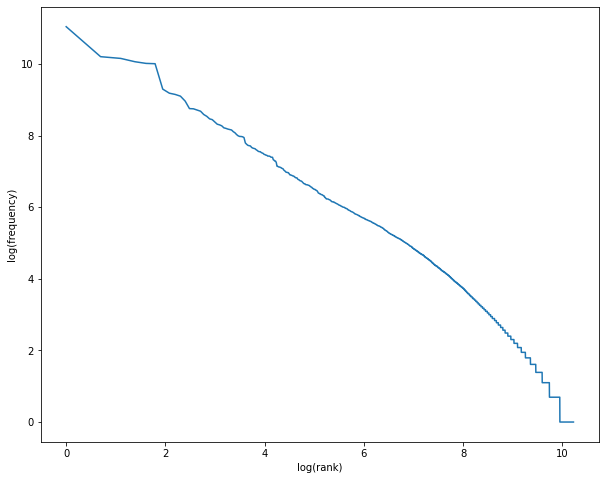

In [96]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.
rank = list(range(1,len(frequency)+1))
plt.figure(figsize=(10,8))
plt.plot([math.log(elem) for elem in rank], [math.log(val) for val in freq_dict.values()])
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")

In [98]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.
ntokens = sum(freq_dict.values())
print(ntokens)

1000000


In [106]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.
top10 = sum([pair[1] for pair in frequency[:10]])
print(top10/ntokens)

0.221568


In [110]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.
once = len([pair for pair in frequency if pair[1] == 1])
print(once/ntokens)

0.006641


## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll explore acquiring new data.

One common way of acquiring data is through application programming interfaces (APIs) to various databases. The Library of Congress's [_Chronicling America_](https://chroniclingamerica.loc.gov/) site aggregates digitized US newspapers from the past two hundred years, such as the [_Seattle Star_](https://chroniclingamerica.loc.gov/lccn/sn87093407/1922-09-19/ed-1/seq-1/) from 100 years ago.

You can use [the API](https://chroniclingamerica.loc.gov/about/api/) to retrieve JSON data listing all issues of the _Seattle Star_: https://chroniclingamerica.loc.gov/lccn/sn87093407.json

Note the list in the `issues` field. For example, here is the record for the September 19, 1922, issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1922-09-19/ed-1.json

In that issue record, you'll see records for each page, e.g.: https://chroniclingamerica.loc.gov/lccn/sn87093407/1922-09-19/ed-1/seq-1.json

And inside that page record, you'll see links to data about that page in various data formats, such as JPEG, PDF, and plain text, which is what we want here: https://chroniclingamerica.loc.gov/lccn/sn87093407/1922-09-19/ed-1/seq-1/ocr.txt

This plain text was transcribed from the old page images using optical character recognition (OCR) models, and so contains errors.

Your task is to acquire and analyze the issues of the _Seattle Star_ from the month of September, 1922, i.e., the issues with a date field that starts with `1922-09`. This should be about the same amount of data as the million words from the Associated Press you analyzed in the last section.

**TODO**: Write code that calls the _Chronicling America_ API to download and extract the text from the _Seattle Star_ from September 1922. You can use the `json` library from above and any other libraries you wish to fetch data from URLs. As you would when working with any production API, you may need to limit your rate of requests.

In [ ]:
# TODO: Data acquisition code here.

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Since this data comes from automatically transcribing printed pages, some words may be hyphenated across line breaks. There is more than one right way to tokenize this data, so add comments to your code documenting your choices.

In [ ]:
# TODO: Tokenization code here.

**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above.

In [ ]:
# TODO: Plotting code here.

**TODO**: What do you observe about the differences between the distributions of the Associated Press and Seattle Star collections? In this text box, give some possible reasons for these differences.